# Data Exploration

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import geopandas as gpd
import warnings

In [22]:
# Suppress warnings
warnings.filterwarnings("ignore")

In [23]:
# Load the dataset
file_path = 'data/processed/uhi.csv'
uhi_data = pd.read_csv(file_path)

In [24]:
uhi_data.head()

,date,zipcode,city,avg_lst_c,precipitation_mm,day_length_sec,max_air_temp_c,min_air_temp_c,water_vapor_pressure_pa,wind_dir_degrees,...,evergreen_forest_pct,mixed_forest_pct,shrub_scrub_pct,grassland_herbaceous_pct,pasture_hay_pct,cultivated_crops,woody_wetlands_pct,emergent_herbaceous_wetlands_pct,avg_ndvi,uhi_observed
0,2022-01-01,87102,ALBUQUERQUE,4.185540,0.000000,34833.610,4.576923,-2.507692,507.88846,269,...,0.0,0.0,1.96,0.00,0.98,0.00,0.18,2.35,0.140142,N
1,2022-01-01,87114,ALBUQUERQUE,2.162587,0.000000,34795.473,5.178846,-3.048846,488.16790,269,...,0.0,0.0,18.75,0.00,1.47,0.00,0.98,3.37,0.153191,N
2,2022-01-01,87105,ALBUQUERQUE,6.488817,0.000000,34863.332,5.010303,-2.410101,511.59900,269,...,0.0,0.0,13.16,0.00,12.83,4.31,0.76,8.22,0.171466,N
3,2022-01-01,87120,ALBUQUERQUE,4.510306,0.000000,34818.170,4.741250,-3.248334,481.10764,269,...,0.0,0.0,70.09,0.03,0.46,0.00,0.16,1.75,0.146227,N
4,2022-01-01,87121,ALBUQUERQUE,4.845354,2.822826,34863.070,4.639294,-3.740950,462.53027,269,...,0.0,0.0,92.99,0.21,0.05,0.03,0.21,0.31,0.135543,N


In the final dataset we have the following columns:
- zipcode - ZIP code
- avg_lst_c - Average Land Surface Temperature
- date - Date
- day_length_sec - Day length (seconds)
- precipitation_mm - Precipitation (mm)
- max_air_temp_c - Maximum air temperature (C)
- min_air_temp_c - Minimum air temperature (C)
- water_vapor_pressure_pa - Water vapor pressure (Pa)
- avg_ndvi - Average Normalized Difference Vegetation Index 
- city - City
- wind_dir_degrees - Wind direction (degrees)
- wind_speed_kmh - Win speed (kmh)
- atm_pressure_hpa - Atmospheric pressure (hPa)
- population_density - Population density
- percent_impervious - Percent of area covered with material preventing water absorption by soil
- open_water_pct - Areas of open water, generally with less than 25% cover of vegetation or soil
- developed_open_space_pct - Areas with a mixture of some constructed materials, but mostly vegetation in the form of lawn grasses. Impervious surfaces account for less than 20% of total cover.
- developed_Low_intensity_pct - Areas with a mixture of constructed materials and vegetation. Impervious surfaces account for 20% to 49% percent of total cover.
- developed_medium_intensity_pct - Areas with a mixture of constructed materials and vegetation. Impervious surfaces account for 50% to 79% of the total cover.
- developed_high_intensity_pct - Highly developed areas where people reside or work in high numbers. Examples include apartment complexes, row houses and commercial/industrial. Impervious surfaces account for 80% to 100% of the total cover.
- barren_land_pct - Areas of bedrock, desert pavement, scarps, talus, slides, volcanic material, glacial debris, sand dunes, strip mines, gravel pits and other accumulations of earthen material. Generally, vegetation accounts for less than 15% of total cover.
- deciduous_forest_pct - Areas dominated by trees generally greater than 5 meters tall, and greater than 20% of total vegetation cover. More than 75% of the tree species shed foliage simultaneously in response to seasonal change.
- evergreen_forest_pct - Areas dominated by trees generally greater than 5 meters tall, and greater than 20% of total vegetation cover. More than 75% of the tree species maintain their leaves all year. Canopy is never without green foliage.
- mixed_forest_pct - Areas dominated by trees generally greater than 5 meters tall, and greater than 20% of total vegetation cover. Neither deciduous nor evergreen species are greater than 75% of total tree cover.
- shrub_scrub_pct - areas dominated by shrubs; less than 5 meters tall with shrub canopy typically greater than 20% of total vegetation. This class includes true shrubs, young trees in an early successional stage or trees stunted from environmental conditions.
- grassland_herbaceous_pct - Areas dominated by gramanoid or herbaceous vegetation, generally greater than 80% of total vegetation. These areas are not subject to intensive management such as tilling, but can be utilized for grazing.
- pasture_hay_pct - Areas of grasses, legumes, or grass-legume mixtures planted for livestock grazing or the production of seed or hay crops, typically on a perennial cycle. Pasture/hay vegetation accounts for greater than 20% of total vegetation.
- cultivated_crops - Areas used for the production of annual crops, such as corn, soybeans, vegetables, tobacco, and cotton, and also perennial woody crops such as orchards and vineyards. Crop vegetation accounts for greater than 20% of total vegetation. This class also includes all land being actively tilled.
- woody_wetlands_pct - Areas where forest or shrubland vegetation accounts for greater than 20% of vegetative cover and the soil or substrate is periodically saturated with or covered with water.
- emergent_herbaceous_wetlands_pct - Areas where perennial herbaceous vegetation accounts for greater than 80% of vegetative cover and the soil or substrate is periodically saturated with or covered with water.
- uhi_observed - indicates, if Urban Heat Island effect was observed

In [25]:
# Convert the 'date' column to datetime format
uhi_data['date'] = pd.to_datetime(uhi_data['date'])
# Replace inf values with NaN
uhi_data = uhi_data.replace([np.inf, -np.inf], np.nan)

In [26]:
# Identify numeric features
numeric_features = uhi_data.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric Features:", numeric_features)

Numeric Features: ['zipcode', 'avg_lst_c', 'precipitation_mm', 'day_length_sec', 'max_air_temp_c', 'min_air_temp_c', 'water_vapor_pressure_pa', 'wind_dir_degrees', 'wind_speed_kmh', 'atm_pressure_hpa', 'population_density', 'percent_impervious', 'open_water_pct', 'developed_open_space_pct', 'developed_low_intensity_pct', 'developed_medium_intensity_pct', 'developed_high_intensity_pct', 'barren_land_pct', 'deciduous_forest_pct', 'evergreen_forest_pct', 'mixed_forest_pct', 'shrub_scrub_pct', 'grassland_herbaceous_pct', 'pasture_hay_pct', 'cultivated_crops', 'woody_wetlands_pct', 'emergent_herbaceous_wetlands_pct', 'avg_ndvi']


In [27]:
# Display basic statistics for the dataset
print("\nBasic Statistics for Numeric Features:")
print(uhi_data[numeric_features].describe())


Basic Statistics for Numeric Features:
            zipcode     avg_lst_c  precipitation_mm  day_length_sec  \
count  50413.000000  50413.000000      50413.000000    50413.000000   
mean   81609.276992     28.762811          0.510967    44175.229494   
std    14291.944296     13.681725          2.553902     6418.696016   
min    43201.000000    -17.011827          0.000000    29386.650000   
25%    80224.000000     17.149008          0.000000    38118.277000   
50%    87121.000000     31.155640          0.000000    45029.184000   
75%    89131.000000     39.546135          0.000000    50292.400000   
max    98136.000000     57.783436         48.720910    57013.340000   

       max_air_temp_c  min_air_temp_c  water_vapor_pressure_pa  \
count    50413.000000    50413.000000             50413.000000   
mean        24.315280        9.019580               851.046082   
std         10.254264        9.939725               506.905814   
min        -13.425200      -25.528378                70.

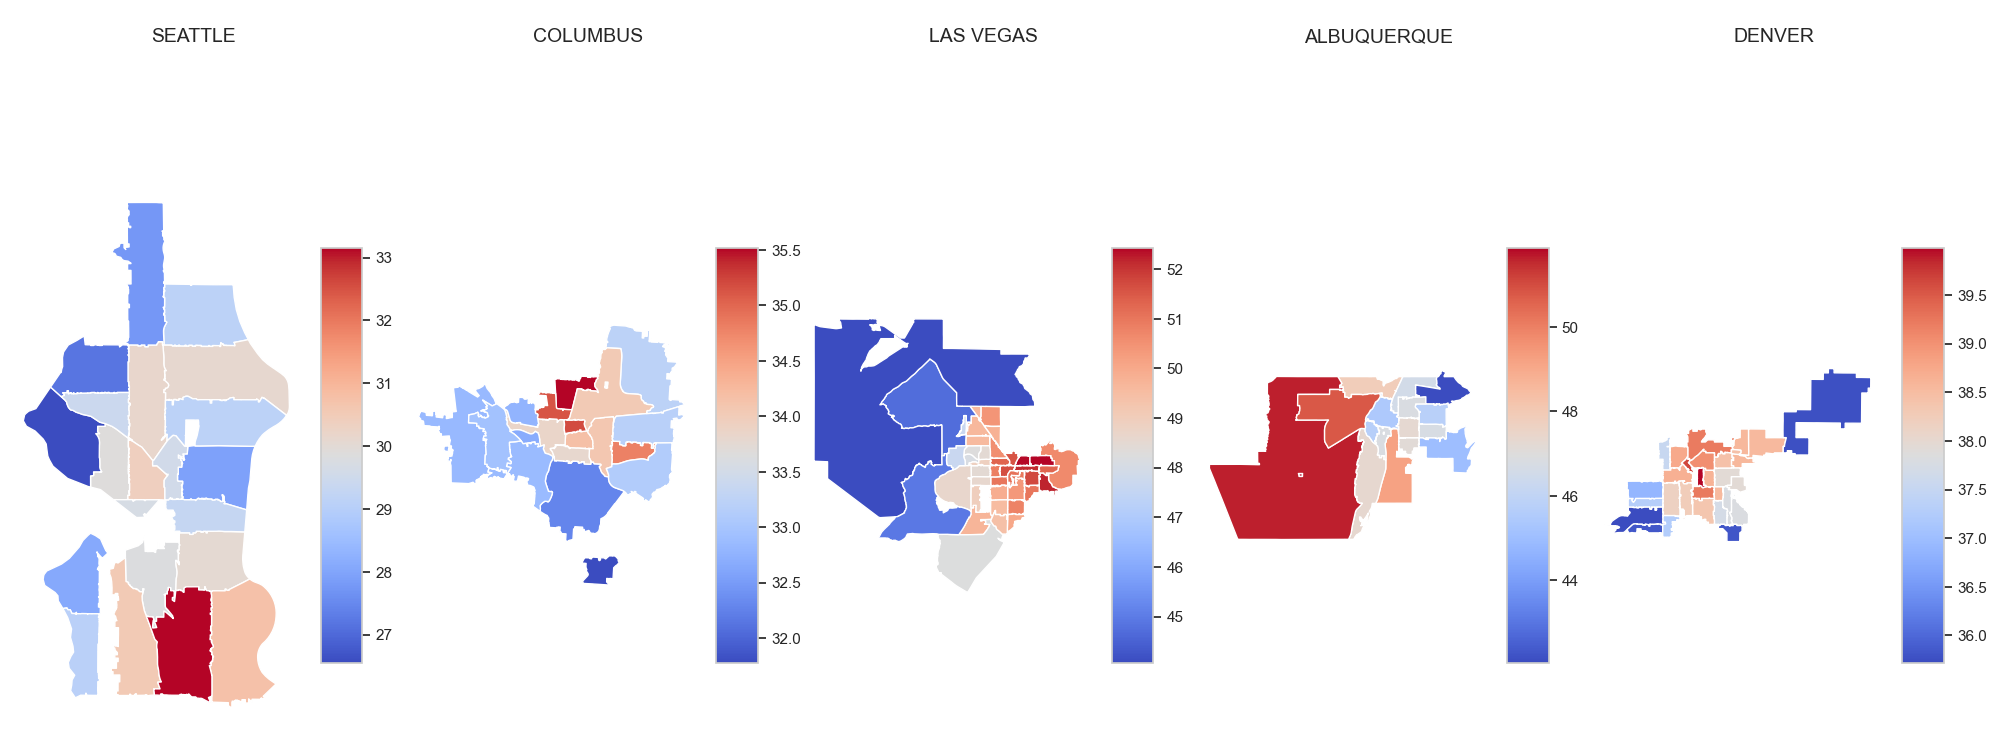

In [49]:
# Load the GeoJSON file
geojson_path = 'data/processed/zipcode_median_lst_july_2023.geojson'
zipcode_shapes_gdf = gpd.read_file(geojson_path)

# Get unique cities
cities = zipcode_shapes_gdf['city'].unique()
n_cities = len(cities)

# Create the figure and grid layout
fig = plt.figure(figsize=(20, 10))
grid = gridspec.GridSpec(2, n_cities, height_ratios=[0.05, 0.95], figure=fig)

# Add city titles in the first row
for idx, city in enumerate(cities):
    ax_title = fig.add_subplot(grid[0, idx])
    ax_title.text(0.5, 0.5, f"{city}", fontsize=14, ha='center', va='center')
    ax_title.axis('off')

# Plot maps in the second row
for idx, city in enumerate(cities):
    ax_map = fig.add_subplot(grid[1, idx], anchor='N')
    city_gdf = zipcode_shapes_gdf[zipcode_shapes_gdf['city'] == city]
    city_gdf.plot(
        column='avg_lst_c', cmap='coolwarm', legend=True, ax=ax_map,
        legend_kwds={'shrink': 0.4, 'aspect': 10, 'label': ''}  # Smaller legend
    )
    ax_map.axis('off')

plt.tight_layout(h_pad=0.1, w_pad=0)
plt.show()

In [29]:
# Setting plot style
sns.set(style="whitegrid")

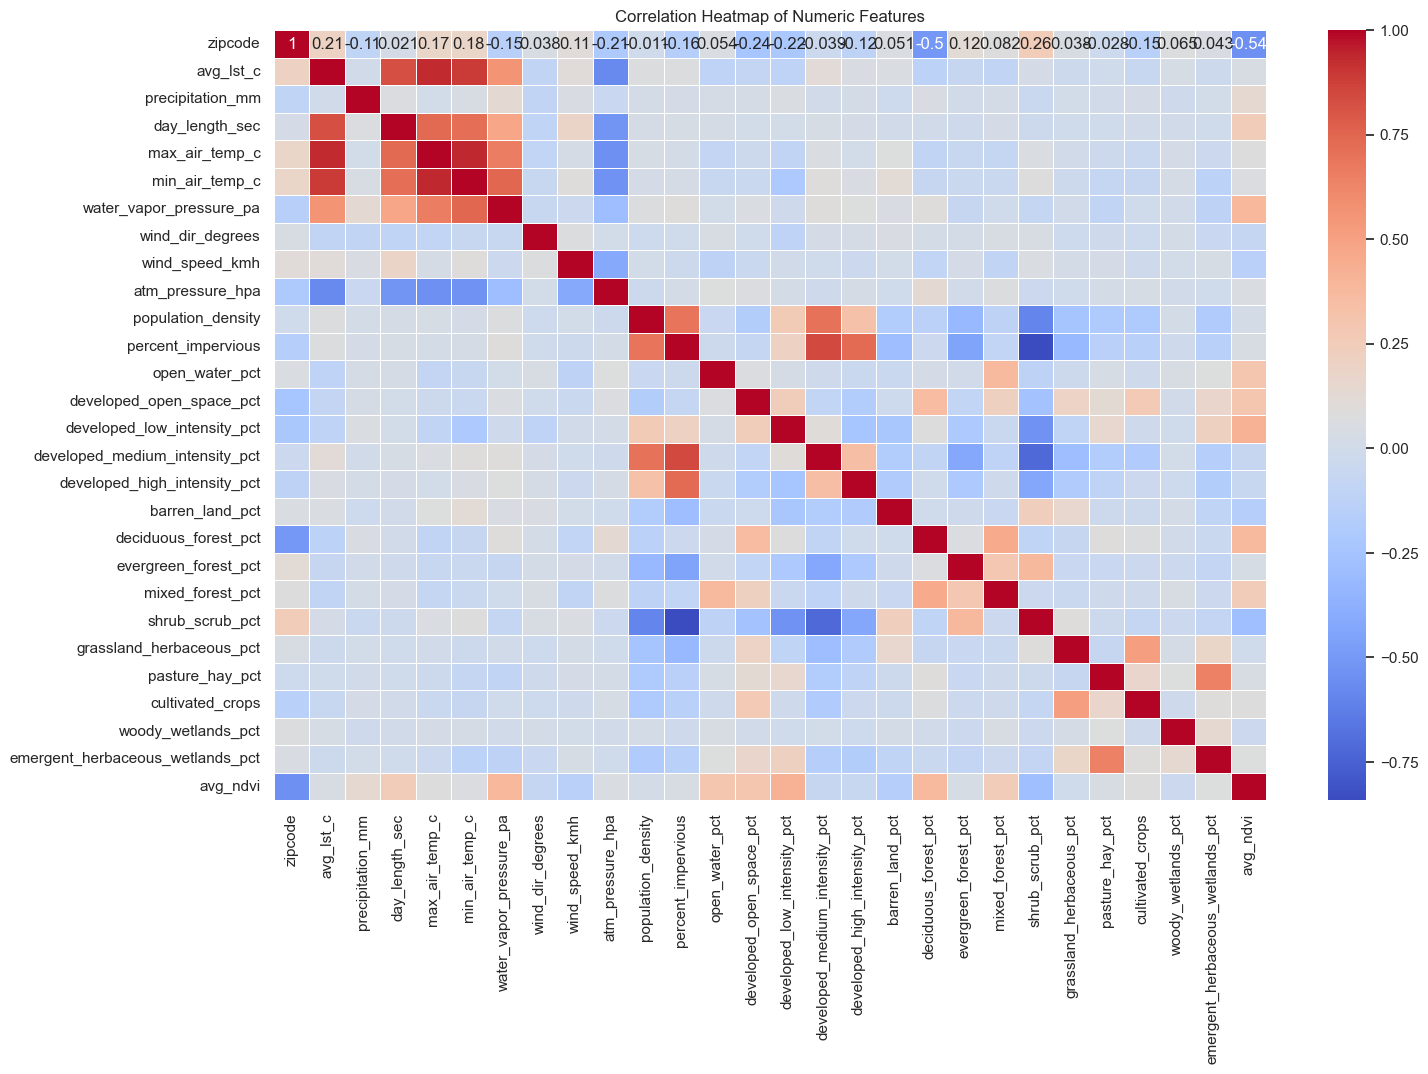

In [30]:
# Correlation Heatmap of Numeric Features
plt.figure(figsize=(16, 10))
corr_matrix = uhi_data[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

The heatmap shows that urbanization features like `developed_high_intensity_pct` and `percent_impervious` are strongly positively correlated with higher land surface temperatures, highlighting their role in driving UHI effects. Conversely, vegetation metrics such as `avg_ndvi` and forest percentages (e.g., `evergreen_forest_pct`) are strongly negatively correlated with temperature, emphasizing the cooling impact of greenery. 

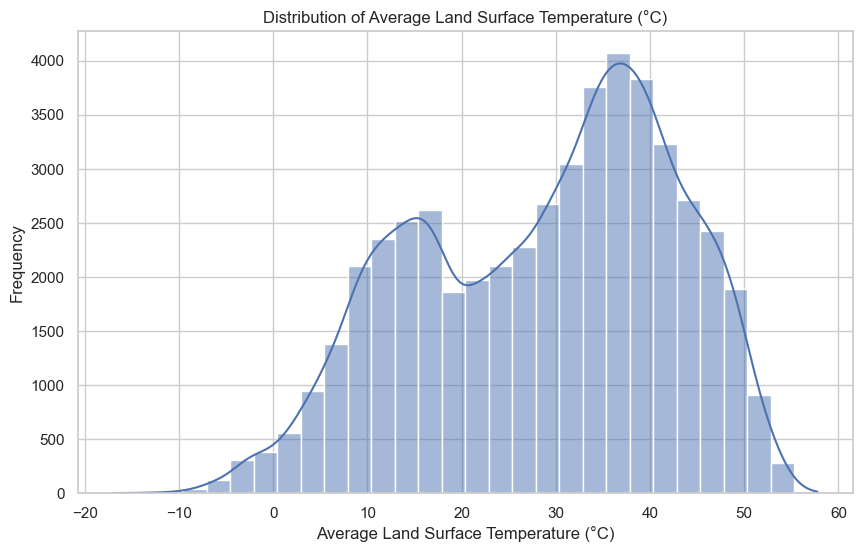

In [31]:
# Distribution of Average Land Surface Temperature
plt.figure(figsize=(10, 6))
sns.histplot(uhi_data['avg_lst_c'], kde=True, bins=30)
plt.title('Distribution of Average Land Surface Temperature (°C)')
plt.xlabel('Average Land Surface Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

The distribution of `avg_lst_c` is bimodal, with peaks around 10–15°C and 35–40°C, indicating two distinct patterns likely tied to rural/vegetated and urbanized areas. Higher temperatures correspond to urban zones with less vegetation and more impervious surfaces, contributing to the Urban Heat Island effect. In contrast, lower temperatures are associated with vegetated or less urbanized regions, highlighting the cooling impact of greenery.

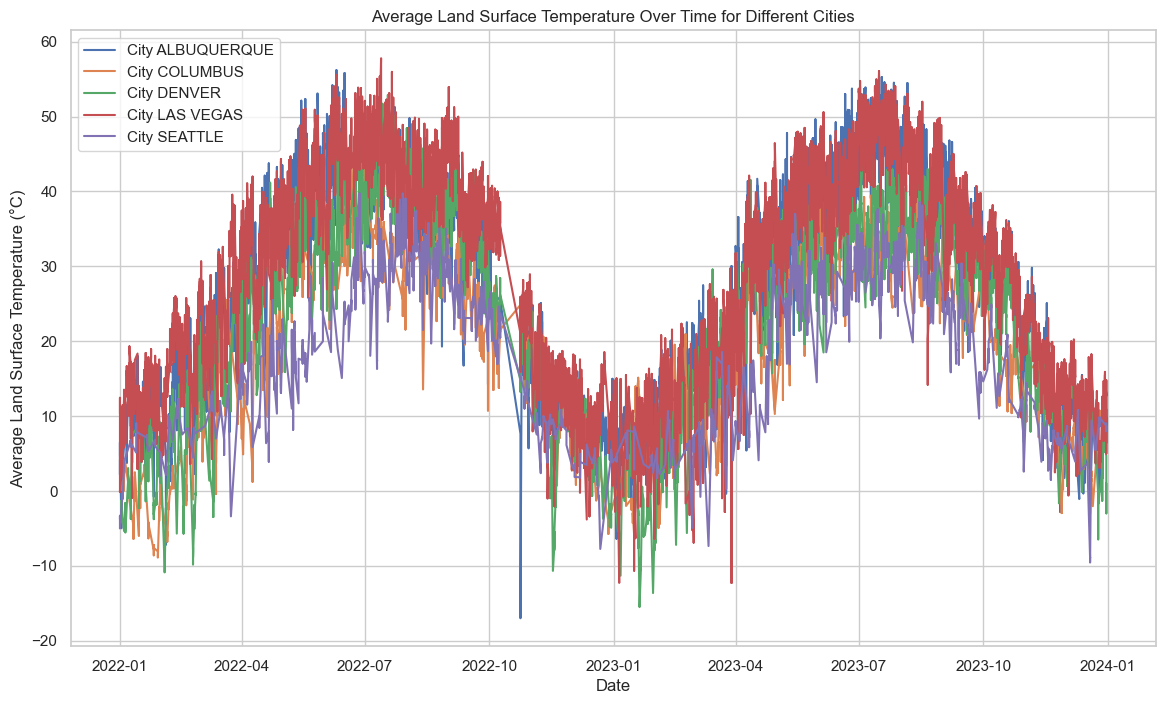

In [32]:
# Average Land Surface Temperature Over Time for Different Cities
plt.figure(figsize=(14, 8))
sample_cities = uhi_data['city'].unique()  # Select a few cities for visualization
for city in sample_cities:
    city_data = uhi_data[uhi_data['city'] == city]
    plt.plot(city_data['date'], city_data['avg_lst_c'], label=f'City {city}')

plt.title('Average Land Surface Temperature Over Time for Different Cities')
plt.xlabel('Date')
plt.ylabel('Average Land Surface Temperature (°C)')
plt.legend()
plt.show()

All cities exhibit a clear seasonal pattern, with higher temperatures in summer and lower temperatures in winter, reflecting typical climate trends. Las Vegas shows the highest average land surface temperatures year-round, likely due to its desert climate and urbanization, while Seattle experiences the lowest due to its cooler, wetter environment. The sharp temperature peaks in cities like Las Vegas and Albuquerque highlight stronger heat retention.

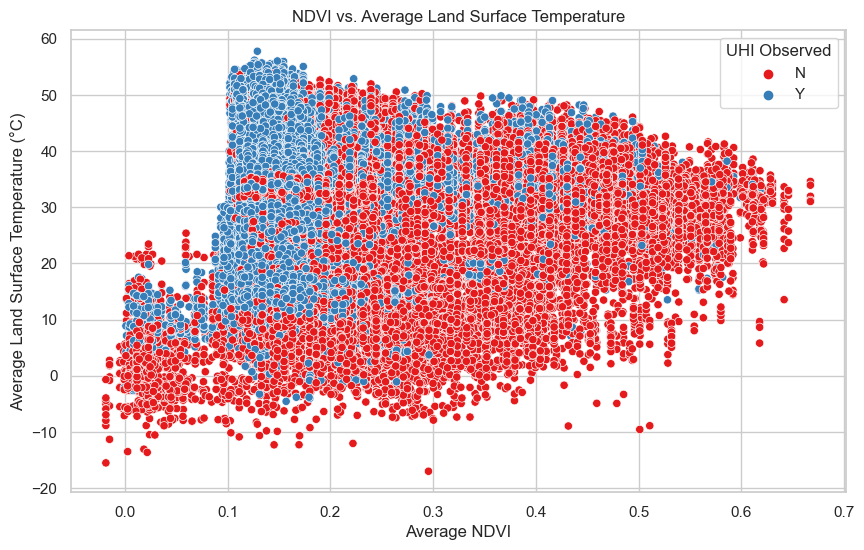

In [33]:
# Relationship between Average Vegetation and Land Surface Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=uhi_data, x='avg_ndvi', y='avg_lst_c', hue='uhi_observed', palette='Set1')
plt.title('NDVI vs. Average Land Surface Temperature')
plt.xlabel('Average NDVI')
plt.ylabel('Average Land Surface Temperature (°C)')
plt.legend(title='UHI Observed')
plt.show()

Higher NDVI values are associated with lower land surface temperatures, highlighting the cooling effect of vegetation. UHI areas are concentrated in regions with low NDVI and high temperatures, showing the impact of reduced greenery in urbanized zones.

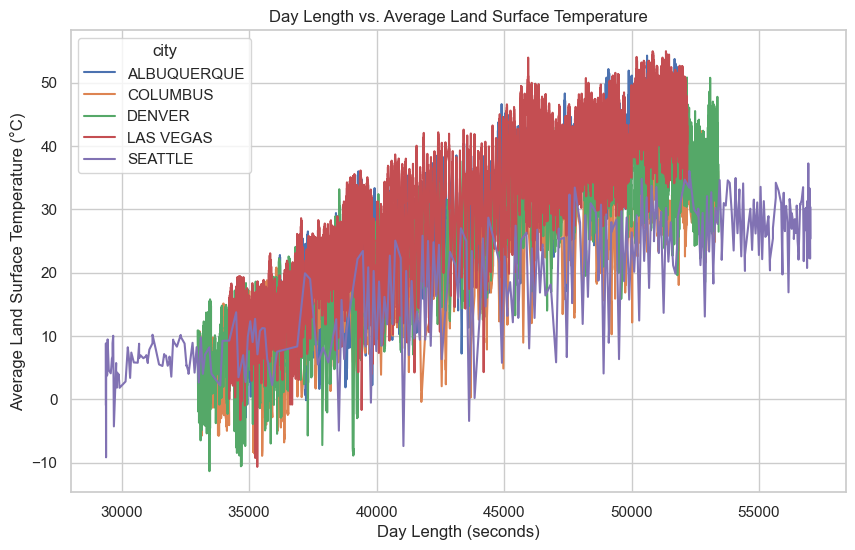

In [34]:
# Day Length vs. Average Land Surface Temperature
plt.figure(figsize=(10, 6))
sns.lineplot(data=uhi_data, x='day_length_sec', y='avg_lst_c', hue='city', ci=None)
plt.title('Day Length vs. Average Land Surface Temperature')
plt.xlabel('Day Length (seconds)')
plt.ylabel('Average Land Surface Temperature (°C)')
plt.show()

Longer day lengths are associated with higher land surface temperatures, as increased sunlight leads to greater heat absorption. Las Vegas consistently shows the highest temperatures, likely due to its desert climate and urbanization, while Seattle remains cooler due to its wetter environment.